In [1]:
import pandas as pd
import os

# Îç∞Ïù¥ÌÑ∞ ÎîîÎ†âÌÜ†Î¶¨
data_dir = "/home/jovyan/work/data"

all_data = []

# Í∞Å ÌÖåÏù¥Î∏îÏóêÏÑú Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
tables = [
    ('accounts_blockrecord_processed.csv', 'user_id'),
    ('accounts_failpaymenthistory.csv', 'user_id'),
    ('accounts_paymenthistory.csv', 'user_id'),
    ('accounts_pointhistory.csv', 'user_id'),
    ('accounts_timelinereport.csv', 'user_id'),
    ('accounts_user_processed.csv', 'id'),  # idÍ∞Ä user_id Ïó≠Ìï†
    ('accounts_userquestionrecord_processed.csv', 'user_id'),
    ('event_receipts.csv', 'user_id'),
    ('polls_questionreport.csv', 'user_id'),
    ('polls_questionset.csv', 'user_id')
]

# ÏùºÎ∞ò ÌÖåÏù¥Î∏îÎì§ Ï≤òÎ¶¨
for file_name, user_col in tables:
    df = pd.read_csv(os.path.join(data_dir, file_name))
    temp_df = df[[user_col, 'created_at']].copy()
    temp_df.columns = ['user_id', 'created_at']
    temp_df['table_name'] = file_name.replace('.csv', '')
    all_data.append(temp_df)

# ÏπúÍµ¨ ÏöîÏ≤≠ ÌÖåÏù¥Î∏î - Î≥¥ÎÇ∏ ÏÇ¨ÎûåÎßå Ìè¨Ìï® (Îä•ÎèôÏ†Å ÌôúÎèô)
df_friend = pd.read_csv(os.path.join(data_dir, 'accounts_friendrequest.csv'))

# Î≥¥ÎÇ∏ ÏÇ¨ÎûåÎßå (Îä•ÎèôÏ†Å ÌôúÎèô)
temp_send = df_friend[['send_user_id', 'created_at']].copy()
temp_send.columns = ['user_id', 'created_at']
temp_send['table_name'] = 'accounts_friendrequest_send'
all_data.append(temp_send)

# Î™®Îì† Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
merged_df = pd.concat(all_data, ignore_index=True)

# created_atÏùÑ datetimeÏúºÎ°ú Î≥ÄÌôò
merged_df['created_at'] = pd.to_datetime(merged_df['created_at'], format='ISO8601', errors='coerce')

# null Í∞í Ï†úÍ±∞
merged_df = merged_df.dropna(subset=['created_at'])

# user_idÎ°ú Í∑∏Î£πÌôîÌïòÍ≥† created_atÏúºÎ°ú Ï†ïÎ†¨
merged_df = merged_df.sort_values(['user_id', 'created_at']).reset_index(drop=True)

print(f"Ï¥ù {len(merged_df):,}Í∞ú Î†àÏΩîÎìú Î≥ëÌï© ÏôÑÎ£å")
print(f"Ïú†ÎãàÌÅ¨ ÏÇ¨Ïö©Ïûê Ïàò: {merged_df['user_id'].nunique():,}")
print("\nÌÖåÏù¥Î∏îÎ≥Ñ Î†àÏΩîÎìú Ïàò:")
print(merged_df['table_name'].value_counts())

Ï¥ù 21,705,813Í∞ú Î†àÏΩîÎìú Î≥ëÌï© ÏôÑÎ£å
Ïú†ÎãàÌÅ¨ ÏÇ¨Ïö©Ïûê Ïàò: 677,085

ÌÖåÏù¥Î∏îÎ≥Ñ Î†àÏΩîÎìú Ïàò:
table_name
accounts_friendrequest_send              17147175
accounts_pointhistory                     2338918
accounts_userquestionrecord_processed     1217558
accounts_user_processed                    677085
polls_questionset                          158384
accounts_paymenthistory                     95140
polls_questionreport                        51424
accounts_blockrecord_processed              19449
event_receipts                                309
accounts_timelinereport                       208
accounts_failpaymenthistory                   163
Name: count, dtype: int64


In [1]:
import pandas as pd
import os

# Í≤ΩÎ°ú ÏÑ§Ï†ï
data_dir = '/home/jovyan/work/data'

# Ìè¨Ïù∏Ìä∏ Ïù¥Î≤§Ìä∏ ÌÖåÏù¥Î∏î
events = pd.read_csv(os.path.join(data_dir, 'events.csv'))

# Ï∂úÏÑù ÌÖåÏù¥Î∏î
accounts_attendance = pd.read_csv(os.path.join(data_dir, 'accounts_attendance.csv'))

# ÏπúÍµ¨ ÏöîÏ≤≠ ÌÖåÏù¥Î∏î
accounts_friendrequest = pd.read_csv(os.path.join(data_dir, 'accounts_friendrequest.csv'))

# ÌïôÍ∏â ÌÖåÏù¥Î∏î
accounts_group = pd.read_csv(os.path.join(data_dir, 'accounts_group.csv'))

# Í∞ÄÍπåÏö¥ ÌïôÍµêÎ•º Í∏∞Î°ùÌï¥ÎëêÍ∏∞ ÏúÑÌïú Í¥ÄÍ≥ÑÌòï ÌÖåÏù¥Î∏î
accounts_nearbyschool = pd.read_csv(os.path.join(data_dir, 'accounts_nearbyschool.csv'))

# Ïú†Ï†Ä Ïª®ÌÉù ÌÖåÏù¥Î∏î
accounts_user_contacts = pd.read_csv(os.path.join(data_dir, 'accounts_user_contacts.csv'))

# ÌïôÍµê ÌÖåÏù¥Î∏î
accounts_school = pd.read_csv(os.path.join(data_dir, 'accounts_school.csv'))

# Ìè¨Ïù∏Ìä∏ Ïù¥Î≤§Ìä∏ Ï∞∏Ïó¨ ÌÖåÏù¥Î∏î
accounts_userwithdraw = pd.read_csv(os.path.join(data_dir, 'accounts_userwithdraw.csv'))

# ÏßàÎ¨∏ ÎÇ¥Ïö© ÌÖåÏù¥Î∏î
polls_question = pd.read_csv(os.path.join(data_dir, 'polls_question.csv'))

# ÏßàÎ¨∏Ïóê ÎåÄÌïú Ïã†Í≥† Í∏∞Î°ù ÌÖåÏù¥Î∏î
polls_questionpiece = pd.read_csv(os.path.join(data_dir, 'polls_questionpiece.csv'))

# ÏßàÎ¨∏Ïóê Îì±Ïû•ÌïòÎäî Ïú†Ï†ÄÎì§ ÌÖåÏù¥Î∏î
polls_usercandidate = pd.read_csv(os.path.join(data_dir, 'polls_usercandidate.csv'))


Í∞ÄÏûÖ Ï¥àÍ∏∞ ÏπúÍµ¨ ÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù ÏûîÏ°¥ ÌôïÎ•†Ïù¥ ÎÜíÎã§?

In [2]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Ï†ÑÏ≤òÎ¶¨
import pandas as pd
import os

# Í≤ΩÎ°ú ÏÑ§Ï†ï
data_dir = '/home/jovyan/work/data'

# Ïú†Ï†Ä Ï†ïÎ≥¥ (ÏûîÏ°¥ Ïó¨Î∂Ä Ìè¨Ìï®)
user_df = pd.read_csv(os.path.join(data_dir, 'accounts_user_processed.csv'))
user_df = user_df.rename(columns={'id': 'user_id'})

# ÏπúÍµ¨ ÏöîÏ≤≠ Ï†ïÎ≥¥
friend_df = pd.read_csv(os.path.join(data_dir, 'accounts_friendrequest.csv'))


: 

: 

: 

In [5]:
# Ï†ÑÏ≤¥ ÏπúÍµ¨ Ïàò (Î≥¥ÎÇ∏ ÏöîÏ≤≠ Í∏∞Ï§Ä)
friend_count = friend_df.groupby('send_user_id').size().reset_index(name='friend_requests_sent')
friend_count = friend_count.rename(columns={'send_user_id': 'user_id'})

# Î≥ëÌï©
user_df = user_df.merge(friend_count, on='user_id', how='left')
user_df['friend_requests_sent'] = user_df['friend_requests_sent'].fillna(0)

# ÏπúÍµ¨ ÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú Î≤îÏ£ºÌòï Î≥ÄÏàò ÏÉùÏÑ±
def categorize_friend_count(x):
    if x == 0:
        return 'none'
    elif x <= 2:
        return 'few(1-2)'
    elif x <= 5:
        return 'some(3-5)'
    else:
        return 'many(6+)'

user_df['friend_count_category'] = user_df['friend_requests_sent'].apply(categorize_friend_count)


In [7]:
# ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏÉùÏ°¥Í∏∞Í∞Ñ Í≥ÑÏÇ∞
user_survival = merged_df.groupby('user_id').agg({
    'created_at': ['first', 'last', 'count']
}).reset_index()

# Ïª¨ÎüºÎ™Ö Ï†ïÎ¶¨
user_survival.columns = ['user_id', 'first_activity', 'last_activity', 'total_events']

print(f"ÏÇ¨Ïö©Ïûê ÏÉùÏ°¥Í∏∞Í∞Ñ ÌÖåÏù¥Î∏î ÏôÑÏÑ±: {len(user_survival):,}Î™Ö")
print(user_survival.head())

# ÏÉùÏ°¥Ïùº Ïàò Í≥ÑÏÇ∞ (Ï∞®Ïù¥ in days)
user_survival['survival_days'] = (user_survival['last_activity'] - user_survival['first_activity']).dt.days

# Ïù¥ÌÉà Ïú†Ï†Ä (ÎãπÏùº Ïú†Ï†Ä): 1, ÏûîÏ°¥ Ïú†Ï†Ä: 0
user_survival['is_churn'] = user_survival['survival_days'].apply(lambda x: 1 if x == 0 else 0)

print(user_survival['is_churn'].value_counts())
# 1: Ïù¥ÌÉà (ÌïòÎ£®Îßå ÌôúÎèô), 0: ÏûîÏ°¥

ÏÇ¨Ïö©Ïûê ÏÉùÏ°¥Í∏∞Í∞Ñ ÌÖåÏù¥Î∏î ÏôÑÏÑ±: 677,085Î™Ö
   user_id             first_activity              last_activity  total_events
0   831956 2023-03-29 03:44:14.047130 2023-03-29 03:44:14.047130             1
1   831962 2023-03-29 05:18:56.162368 2023-07-13 07:51:59.000000             2
2   832151 2023-03-29 12:56:34.989468 2023-05-09 15:50:58.000000            11
3   832340 2023-03-29 12:56:35.020790 2023-05-11 00:51:26.000000            29
4   832520 2023-03-29 12:56:35.049311 2023-03-29 12:56:35.049311             1
is_churn
0    441629
1    235456
Name: count, dtype: int64


In [8]:
# merged_dfÎ•º Í∏∞Î∞òÏúºÎ°ú ÏµúÏ¥à ÌôúÎèôÏùºÍ≥º ÏµúÏ¢Ö ÌôúÎèôÏùºÏùò Ï∞®Ïù¥Î•º 24ÏãúÍ∞Ñ Îã®ÏúÑÎ°ú Í≥ÑÏÇ∞Ìï¥ÏÑú ÏÉùÏÑ±

user_df = user_df.merge(user_survival[['user_id', 'is_churn']], on='user_id', how='left')
user_df['retained'] = user_df['is_churn'].apply(lambda x: 0 if x == 1 else 1)

In [9]:
from scipy.stats import pointbiserialr

corr, pval = pointbiserialr(user_df['retained'], user_df['friend_requests_sent'])
print(f'[Ï†êÏù¥Ïó∞ ÏÉÅÍ¥ÄÎ∂ÑÏÑù] ÏÉÅÍ¥ÄÍ≥ÑÏàò: {corr:.3f}, p-value: {pval:.5f}')


[Ï†êÏù¥Ïó∞ ÏÉÅÍ¥ÄÎ∂ÑÏÑù] ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.256, p-value: 0.00000


In [10]:
from scipy.stats import chi2_contingency

ct = pd.crosstab(user_df['friend_count_category'], user_df['retained'])
chi2, p, dof, expected = chi2_contingency(ct)

print('[Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï]')
print(ct)
print(f'Chi2 ÌÜµÍ≥ÑÎüâ: {chi2:.3f}, p-value: {p:.5f}')


[Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï]
retained                    0       1
friend_count_category                
few(1-2)                17652    7472
many(6+)               168006  415178
none                    27012    1001
some(3-5)               22786   17978
Chi2 ÌÜµÍ≥ÑÎüâ: 78061.443, p-value: 0.00000


In [11]:
import statsmodels.api as sm
import numpy as np

X = sm.add_constant(user_df['friend_requests_sent'])
y = user_df['retained']

model = sm.Logit(y, X).fit()
print(model.summary())

# Ïò§Ï¶àÎπÑ Ï∂úÎ†•
odds_ratio = np.exp(model.params['friend_requests_sent'])
print(f'Odds Ratio: {odds_ratio:.3f}')


Optimization terminated successfully.
         Current function value: 0.599167
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               retained   No. Observations:               677085
Model:                          Logit   Df Residuals:                   677083
Method:                           MLE   Df Model:                            1
Date:                Tue, 17 Jun 2025   Pseudo R-squ.:                 0.07256
Time:                        04:42:49   Log-Likelihood:            -4.0569e+05
converged:                       True   LL-Null:                   -4.3743e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2173      0.004    -49.812      0.000      -0.226      -0.209

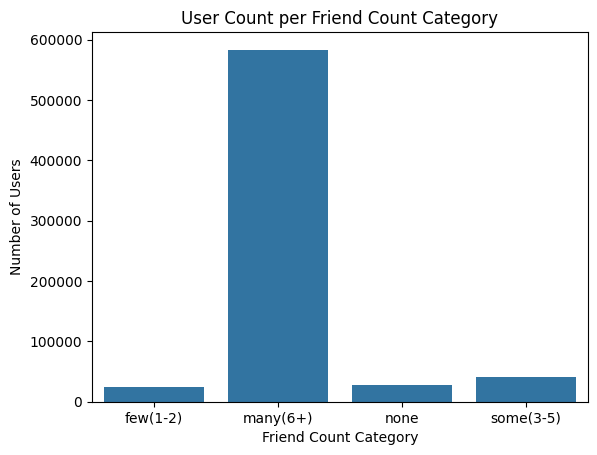

In [14]:
# ÏπúÍµ¨ Ïàò 0Î™Ö Í∑∏Î£π Í≥ºÎåÄÌëúÏßë ÌôïÏù∏Ïö© ÏãúÍ∞ÅÌôî
import seaborn as sns
import matplotlib.pyplot as plt

# ÏπúÍµ¨ Ïàò Î≤îÏ£ºÎ≥Ñ Ï†ÑÏ≤¥ Ïú†Ï†Ä Ïàò (ÎπàÎèÑ)
friend_cat_counts = user_df['friend_count_category'].value_counts().sort_index()

# ÏãúÍ∞ÅÌôî
sns.barplot(x=friend_cat_counts.index, y=friend_cat_counts.values)
plt.title('User Count per Friend Count Category')  # ÏπúÍµ¨ Ïàò Î≤îÏ£ºÎ≥Ñ Ïú†Ï†Ä Ïàò
plt.xlabel('Friend Count Category')
plt.ylabel('Number of Users')
plt.show()


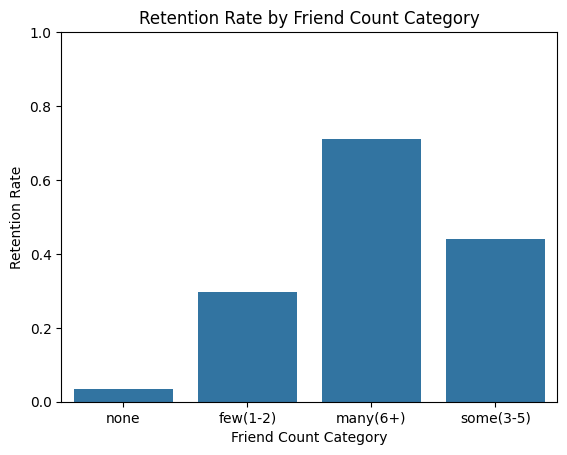

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create barplot for retention rate by friend count category
sns.barplot(data=user_df, x='friend_count_category', y='retained', errorbar=None)  # ‚Üí ci=None ÎåÄÏã† errorbar=None
plt.title('Retention Rate by Friend Count Category')  # ÏπúÍµ¨ Ïàò Î≤îÏ£ºÎ≥Ñ ÏûîÏ°¥Ïú®
plt.ylabel('Retention Rate')  # ÏûîÏ°¥ ÎπÑÏú®
plt.xlabel('Friend Count Category')  # ÏπúÍµ¨ Ïàò Î≤îÏ£º
plt.ylim(0, 1)  # ÎπÑÏú®Ìòï Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî Î≤îÏúÑ ÏÑ§Ï†ï

plt.show()


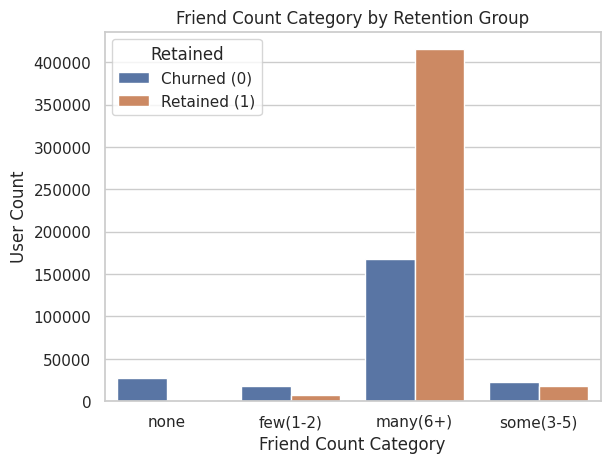

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style='whitegrid')

# Create grouped barplot
sns.countplot(data=user_df, x='friend_count_category', hue='retained')  # ÏûîÏ°¥ Ïó¨Î∂ÄÏóê Îî∞Îùº ÏÉâ Íµ¨Î∂Ñ
plt.title('Friend Count Category by Retention Group')  # ÏûîÏ°¥ Í∑∏Î£πÎ≥Ñ ÏπúÍµ¨ Ïàò Î≤îÏ£º Î∂ÑÌè¨
plt.xlabel('Friend Count Category')  # ÏπúÍµ¨ Ïàò Î≤îÏ£º
plt.ylabel('User Count')  # Ïú†Ï†Ä Ïàò
plt.legend(title='Retained', labels=['Churned (0)', 'Retained (1)'])  # Î≤îÎ°Ä: Ïù¥ÌÉà / ÏûîÏ°¥
plt.show()


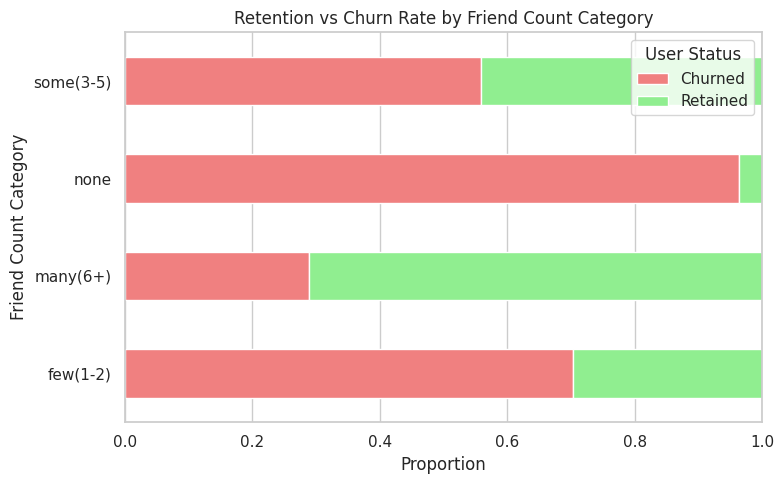

In [12]:
# Í∑∏Î£πÎ≥Ñ count Í≥ÑÏÇ∞ ÌõÑ ÎπÑÏú®Î°ú Î≥ÄÌôò
count_df = user_df.groupby(['friend_count_category', 'retained']).size().unstack(fill_value=0)

# ÎπÑÏú® Í≥ÑÏÇ∞
prop_df = count_df.div(count_df.sum(axis=1), axis=0).reset_index()

# Ïª¨ÎüºÎ™ÖÏùÑ Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ¶¨
prop_df = prop_df.rename(columns={0: 'Churned', 1: 'Retained'})

import matplotlib.pyplot as plt

# Ïù∏Îç±Ïä§ ÏÑ§Ï†ï ÌõÑ Í∞ÄÎ°ú ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî
prop_df.set_index('friend_count_category')[['Churned', 'Retained']].plot(
    kind='barh',                     # Í∞ÄÎ°ú ÎßâÎåÄ Í∑∏ÎûòÌîÑ
    stacked=True,                    # Ïä§ÌÉù ÌòïÌÉú
    figsize=(8, 5),
    color=['#f08080', '#90ee90']     # Ïù¥ÌÉà: Ïó∞Ìïú Îπ®Í∞ï, ÏûîÏ°¥: Ïó∞Ìïú Ï¥àÎ°ù
)

plt.title('Retention vs Churn Rate by Friend Count Category')  # ÏπúÍµ¨ Ïàò Î≤îÏ£ºÎ≥Ñ ÏûîÏ°¥/Ïù¥ÌÉà ÎπÑÏú®
plt.xlabel('Proportion')   # xÏ∂ï: ÎπÑÏú®
plt.ylabel('Friend Count Category')  # yÏ∂ï: ÏπúÍµ¨ Ïàò Î≤îÏ£º
plt.xlim(0, 1)
plt.legend(title='User Status')
plt.tight_layout()
plt.show()



In [16]:
import psutil

def check_memory():
    """ÌòÑÏû¨ Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ ÌôïÏù∏"""
    mem = psutil.virtual_memory()
    used_gb = mem.used / (1024**3)
    total_gb = mem.total / (1024**3)
    percent = mem.percent
    
    print(f"üíæ Î©îÎ™®Î¶¨: {used_gb:.1f}GB / {total_gb:.1f}GB ({percent:.1f}%)")
    
    if percent > 80:
        print("üî¥ Í≤ΩÍ≥†: Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Î•† ÎÜíÏùå!")
    elif percent > 60:
        print("üü° Ï£ºÏùò: Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Î•† Ï¶ùÍ∞Ä")
    else:
        print("üü¢ Î©îÎ™®Î¶¨ ÏÉÅÌÉú ÏñëÌò∏")
    
    return percent

# ÌòÑÏû¨ Î©îÎ™®Î¶¨ ÏÉÅÌÉú ÌôïÏù∏
check_memory()

üíæ Î©îÎ™®Î¶¨: 6.4GB / 7.7GB (85.9%)
üî¥ Í≤ΩÍ≥†: Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Î•† ÎÜíÏùå!


85.9

In [17]:
print(user_df.head())


   user_id  is_superuser  is_staff gender  point  \
0   831956             1         1    NaN    600   
1   831962             0         0      F   2248   
2   832151             0         0      M   1519   
3   832340             0         0      F     57   
4   832520             0         0      M   1039   

                                      friend_id_list  is_push_on  \
0  [1292473, 913158, 1488461, 1064695, 1043565, 1...           0   
1  [833025, 832642, 982531, 879496, 838541, 83752...           1   
2  [838785, 982531, 882567, 879496, 838541, 83649...           0   
3  [841345, 982531, 838785, 963714, 882567, 83252...           1   
4  [874050, 849763, 874212, 844297, 838541, 84004...           0   

                   created_at block_user_id_list hide_user_id_list  ...  \
0  2023-03-29 03:44:14.047130                 []                []  ...   
1  2023-03-29 05:18:56.162368                 []                []  ...   
2  2023-03-29 12:56:34.989468                 []     

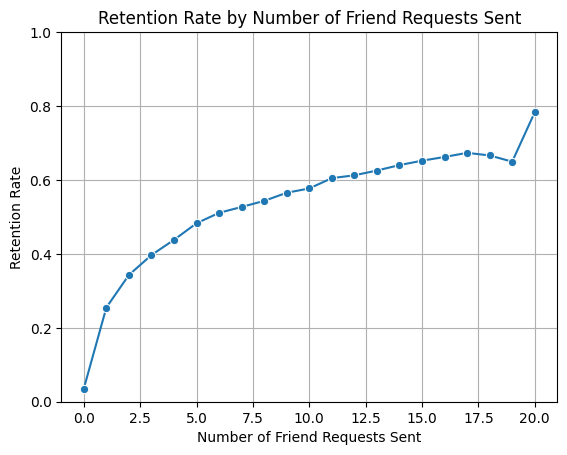

In [18]:
# friend_requests_sent Î≤îÏ£ºÌôî (Ïòà: 0~10ÍπåÏßÄÎßå ÌëúÏãú)
user_df['friend_sent_bin'] = user_df['friend_requests_sent'].clip(upper=20)

# ÌèâÍ∑† ÏûîÏ°¥Ïú® Í≥ÑÏÇ∞
bin_retention = user_df.groupby('friend_sent_bin')['retained'].mean().reset_index()

# ÏãúÍ∞ÅÌôî
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=bin_retention, x='friend_sent_bin', y='retained', marker='o')
plt.title('Retention Rate by Number of Friend Requests Sent')  # Î≥¥ÎÇ∏ ÏπúÍµ¨ ÏöîÏ≤≠ ÏàòÏóê Îî∞Î•∏ ÏûîÏ°¥Ïú®
plt.xlabel('Number of Friend Requests Sent')
plt.ylabel('Retention Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# ÌñâÎèôÏóê Îî∞Î•∏ Í≤∞Í≥º Î≥ÄÌôî ÌôïÏù∏ -> ÏπúÍµ¨ÏöîÏ≤≠ÏàòÍ∞Ä ÎßéÏïÑÏßàÏàòÎ°ù ÏûîÏ°¥Ìï†Í∞ÄÎä•ÏÑ±ÎèÑ Í∞ôÏù¥ Ï¶ùÍ∞ÄÌïòÎÇò?

In [19]:
# Í∞ÄÏûÖÏùº Ï∂îÏ∂ú
signup_df = user_df[['user_id', 'created_at']].rename(columns={'created_at': 'signup_time'})
signup_df['signup_time'] = pd.to_datetime(signup_df['signup_time'])

# ÏπúÍµ¨ÏöîÏ≤≠ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
friend_df = pd.read_csv(os.path.join(data_dir, 'accounts_friendrequest.csv'))
friend_df = friend_df.rename(columns={'send_user_id': 'user_id'})
friend_df['created_at'] = pd.to_datetime(friend_df['created_at'])

friend_df = friend_df.merge(signup_df, on='user_id', how='left')
friend_df['hour_diff'] = (friend_df['created_at'] - friend_df['signup_time']).dt.total_seconds() / 3600

# Ï≤´ÎÇ† ÏöîÏ≤≠ Ïàò Í≥ÑÏÇ∞
friend_day1_df = friend_df[friend_df['hour_diff'] <= 24]
friend_day1_counts = friend_day1_df.groupby('user_id').size().reset_index(name='friend_requests_day1')
user_df = user_df.merge(friend_day1_counts, on='user_id', how='left')
user_df['friend_requests_day1'] = user_df['friend_requests_day1'].fillna(0)

# ÏûîÏ°¥ Ïó¨Î∂Ä Î≥ëÌï©
user_df = user_df.merge(user_survival[['user_id', 'is_churn']], on='user_id', how='left')
user_df['retained'] = user_df['is_churn'].apply(lambda x: 0 if x == 1 else 1)



: 

: 

: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

subset = user_df[user_df['friend_requests_day1'] <= 20]

sns.kdeplot(
    data=subset,
    x='friend_requests_day1',
    hue='retained',
    common_norm=False,
    fill=True
)

plt.title('Distribution of Friend Requests on Signup Day by Retention')
plt.xlabel('Friend Requests Sent on Signup Day')
plt.ylabel('Density')
plt.legend(title='Retained', labels=['Churned (0)', 'Retained (1)'])
plt.grid(True)
plt.show()


# Í∞ÄÏÑ§: Í∞ÄÏûÖ Ï¥àÍ∏∞ ÏπúÍµ¨ ÏàòÏôÄ ÏÇ¨Ïö©Ïûê ÏûîÏ°¥ Í∞ÑÏùò Í¥ÄÍ≥Ñ

> **"Í∞ÄÏûÖ Ï¥àÍ∏∞ ÏπúÍµ¨ ÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù ÏÇ¨Ïö©ÏûêÍ∞Ä ÏÑúÎπÑÏä§Î•º ÏßÄÏÜçÏ†ÅÏúºÎ°ú Ïù¥Ïö©Ìï† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§"**

‚Üí Ï¥àÍ∏∞Ïóê ÏπúÍµ¨Í¥ÄÍ≥ÑÏùò ÌòïÏÑ±Ïù¥ ÏÇ¨Ïö©Ïûê ÏûîÏ°¥Ïóê Í∏çÏ†ïÏ†Å ÏòÅÌñ•ÏùÑ Ï§ÄÎã§.

---

## üìä ÏÇ¨Ïö© Î∂ÑÏÑù Î∞©Î≤ï

- **Ï†êÏù¥Ïó∞ ÏÉÅÍ¥ÄÎ∂ÑÏÑù**  
  ‚Üí ÏπúÍµ¨ ÏöîÏ≤≠ Ïàò(Ïó∞ÏÜçÌòï)ÏôÄ ÏûîÏ°¥ Ïó¨Î∂Ä(Ïù¥ÏßÑÌòï) Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞

- **Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï**  
  ‚Üí ÏπúÍµ¨ Ïàò Î≤îÏ£º(`none`, `few`, `some`, `many`)Ïóê Îî∞Îùº ÏûîÏ°¥Ïú® Ï∞®Ïù¥ Í≤ÄÏ†ï

- **Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä**  
  ‚Üí ÏπúÍµ¨ ÏöîÏ≤≠ ÏàòÍ∞Ä ÏûîÏ°¥ ÌôïÎ•†Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÑ Ï∂îÏ†ï (ÏòàÏ∏°Î™®Îç∏ Í∏∞Î∞ò)

---

## ‚úÖ Î∂ÑÏÑù Í≤∞Í≥º

### 1. Ï†êÏù¥Ïó∞ ÏÉÅÍ¥ÄÎ∂ÑÏÑù
- ÏÉÅÍ¥ÄÍ≥ÑÏàò: **0.256**, *p* < 0.001  
- ÏπúÍµ¨ ÏöîÏ≤≠ ÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù ÏûîÏ°¥Ìï† Í∞ÄÎä•ÏÑ±Ïù¥ Ïú†ÏùòÎØ∏ÌïòÍ≤å **ÏñëÏùò ÏÉÅÍ¥Ä**ÏùÑ Î≥¥ÏûÑ  
- Îã§Îßå, ÏÉÅÍ¥ÄÍ≥ÑÏàòÏùò ÌÅ¨Í∏∞Îäî **Ï§ëÍ∞Ñ Ïù¥Ìïò ÏàòÏ§Ä**

---

### 2. Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï

| ÏπúÍµ¨ Ïàò Î≤îÏ£º      | Ïù¥ÌÉàÏûê Ïàò | ÏûîÏ°¥Ïûê Ïàò | ÏûîÏ°¥Ïú®   |
|------------------|-----------|-----------|----------|
| none (0Î™Ö)       | 27,012    | 1,001     | **3.6%** |
| few (1~2Î™Ö)      | 17,652    | 7,472     | **29.7%** |
| some (3~5Î™Ö)     | 22,786    | 17,978    | **44.1%** |
| many (6Î™Ö Ïù¥ÏÉÅ)  | 168,006   | 415,178   | **71.2%** |

- Chi¬≤ = **78,061**, *p* < 0.001  
- ÏπúÍµ¨ ÏàòÏóê Îî∞Îùº **ÏûîÏ°¥Ïú®Ïóê Îß§Ïö∞ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥** Ï°¥Ïû¨  
- ÌäπÌûà ÏπúÍµ¨Í∞Ä ÏóÜÎäî Í≤ΩÏö∞ ÏûîÏ°¥Ïú®Ïù¥ Îß§Ïö∞ ÎÇÆÍ≥†, ÏπúÍµ¨ ÏàòÍ∞Ä ÎßéÏïÑÏßàÏàòÎ°ù ÏßÄÏÜç Ïù¥Ïö©Î•†Ïù¥ Í∏âÍ≤©Ìûà Ï¶ùÍ∞ÄÌï®

---

### 3. Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î∂ÑÏÑù

- ÌöåÍ∑ÄÏãù: `retained ~ friend_requests_sent`
- ÏπúÍµ¨ ÏöîÏ≤≠ ÏàòÍ∞Ä 1Í±¥ Ï¶ùÍ∞ÄÌï† ÎïåÎßàÎã§ **ÏûîÏ°¥ ÌôïÎ•†Ïù¥ ÏïΩ 1.039Î∞∞ Ï¶ùÍ∞Ä**
- Í≥ÑÏàò: **0.0383**, *p* < 0.001  
- **Odds Ratio = 1.039**, **Pseudo R¬≤ = 0.073**
- ÏÑ§Î™ÖÎ†•ÏùÄ ÎÇÆÏßÄÎßå, ÏπúÍµ¨ ÏàòÎäî ÏûîÏ°¥Ïóê Ïú†ÏùòÌïú ÏòàÏ∏° Î≥ÄÏàòÎ°ú ÏûëÏö©Ìï®

---

## üß© Ìï¥ÏÑù Î∞è Í≤∞Î°†

- Í∞ÄÏûÖ Ï¥àÍ∏∞ ÏπúÍµ¨ ÏöîÏ≤≠ ÌôúÎèôÏù¥ ÎßéÏùÑÏàòÎ°ù ÏÇ¨Ïö©ÏûêÍ∞Ä **ÏßÄÏÜçÏ†ÅÏúºÎ°ú ÏÑúÎπÑÏä§Ïóê Î®∏Î¨º Í∞ÄÎä•ÏÑ±Ïù¥ Ïú†ÏùòÌïòÍ≤å ÎÜíÏùå**
- ÏπúÍµ¨Í∞Ä **0Î™ÖÏù∏ Ïú†Ï†ÄÎäî ÏûîÏ°¥Ïú®Ïù¥ Í∑πÎã®Ï†ÅÏúºÎ°ú ÎÇÆÏùå(3.6%)**
- ÏπúÍµ¨ ÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù ÏûîÏ°¥Ïú®Ïù¥ Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•ÏùÄ **"Ï¥àÍ∏∞ ÎÑ§Ìä∏ÏõåÌÅ¨ ÌòïÏÑ±"Ïù¥ ÏûîÏ°¥Ïóê ÌïµÏã¨ Ïó≠Ìï†ÏùÑ Ìï† Ïàò ÏûàÏùå**ÏùÑ ÏãúÏÇ¨




In [ ]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Ï†ÑÏ≤òÎ¶¨
import pandas as pd
import os

# Í≤ΩÎ°ú ÏÑ§Ï†ï
data_dir = '/home/jovyan/work/data'

# Ïú†Ï†Ä Ï†ïÎ≥¥ (ÏûîÏ°¥ Ïó¨Î∂Ä Ìè¨Ìï®)
user_df = pd.read_csv(os.path.join(data_dir, 'accounts_user_processed.csv'))
user_df = user_df.rename(columns={'id': 'user_id'})

# ÏπúÍµ¨ ÏöîÏ≤≠ Ï†ïÎ≥¥
friend_df = pd.read_csv(os.path.join(data_dir, 'accounts_friendrequest.csv'))
